# **RURBIC: E1 (RESULTS)**

I will discuss the results in sequence:


*   Selection of ARIMA model: By using the auto_arima function, we were able to find the best ARIMA model with the lowest AIC:


In [24]:
from pmdarima import auto_arima
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

In [12]:
#Import CSV and create dataframe
df= pd.read_csv("/content/medical_time_series.csv"  )
df['Date'] = (pd.date_range(start=datetime(2022, 1, 1),periods=df.shape[0], freq='24H'))
df.set_index('Date' ,inplace=True)

In [13]:
#Find the best model using Auto-ARIMA
stepwise_fit=auto_arima(df['Revenue'],  trace=True, suppress_warnings=True)
stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=883.277, Time=1.95 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1015.972, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=881.359, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=906.199, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1015.481, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=883.300, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=883.314, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=883.348, Time=0.75 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=879.982, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=881.911, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=881.927, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=905.166, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=881.947, Time=0.35 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 4.507 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  731
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -437.991
Date:                Fri, 31 May 2024   AIC                            879.982
Time:                        18:25:28   BIC                            889.168
Sample:                    01-01-2022   HQIC                           883.526
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4142      0.034     12.258      0.000       0.348       0.480
sigma2         0.1943      0.011     17.842      0.000       0.173       0.216
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.92
Prob(Q):                              0.90   Prob(JB):                         0.38
Heteroskedasticity (H):               1.00   Skew:                            -0.02
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The output was of an order of (1,1,0).

In [17]:
#Apply 1,1,0 to ARIMA
df= df[['Revenue']]
model = ARIMA(df, order=(1, 1, 0))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  731
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -437.991
Date:                Fri, 31 May 2024   AIC                            879.982
Time:                        18:26:59   BIC                            889.168
Sample:                    01-01-2022   HQIC                           883.526
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4142      0.034     12.258      0.000       0.348       0.480
sigma2         0.1943      0.011     17.842      0.000       0.173       0.216
Ljung-Box (L1) (Q):                   0.02   Jarque-

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


*   Prediction interval of the forecast: As I mentioned in section D3, we have compared the test data which starts on 2023-10-01 and ends on 2024-01-01 along with the prediction data, which equals to 93 days, the interval is based on a daily level. Thus, the interval is 1 day.

*   Justification of the forecast length: I chose 180-days to put the model on a real-life basis test, usually forecasts in companies are done for 180-days or less. Also, since we have only 2 years of data, predicting more than 1 more will not be accurate. Thus, I chose a 6-month period which is right in the middle.

* Model evaluation procedure and error metric:  The model has been chosen based on the auto_ARIMA function that gives us the best order of the ARIMA model having the best parameters. Thus, our final ARIMA model was of order (1,1,0). To evaluate that model, we can retrieve the MAE (Mean Absolute Error) by running the following code:




In [20]:
mae= np.mean(np.abs(results.resid))
print("Mean absolute Error", mae)


Mean absolute Error 0.3556195422765465


Having an MAE close to 0 is a good sign that the errors in our model are minimal, thus the value of 0.355 (shown above) is an acceptable value. For additional information, we can retrieve some diagnostics by running the following code:

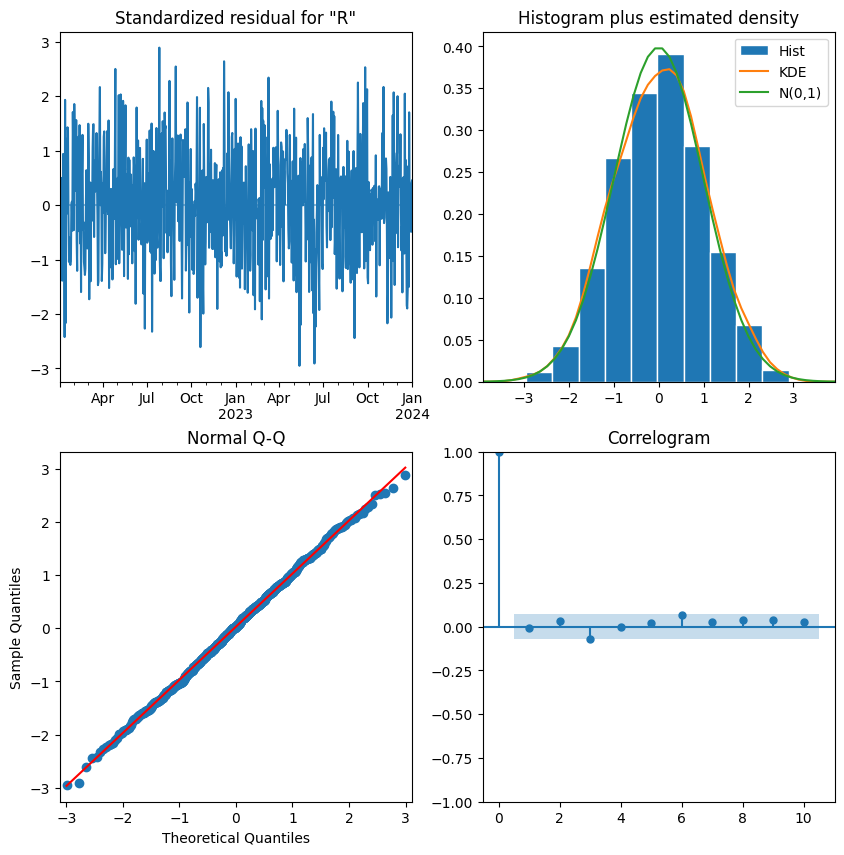

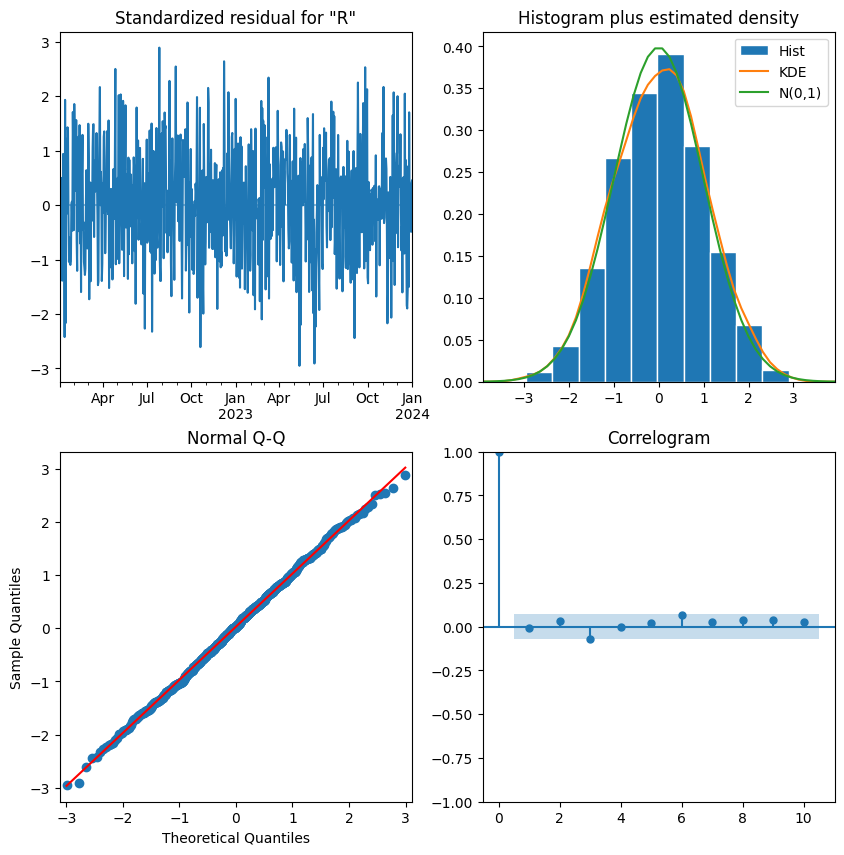

In [22]:
results.plot_diagnostics(figsize=(10,10))

Going chart by chart we can realize the following:

*   Top left chart: This chart reveals that there are no patterns in the data which meet our goals.
*   Top right chart: This chart reveals that there is a normal distribution of KDE, which meets our goals.
*   Bottom left chart: This chart reveals that all datapoints are following the red line, which meets our goals.
*   Bottom right chart: This chart reveals that there are no lags in the shaded blue area, which meets our goals.




# **RUBRIC: E2 (ANNOTATED VISUALIZATION)**

Below is the annotated visualization of the forecast of the final model compared to the test and training datasets, using the following code to retrieve the output:

<Figure size 1200x400 with 0 Axes>

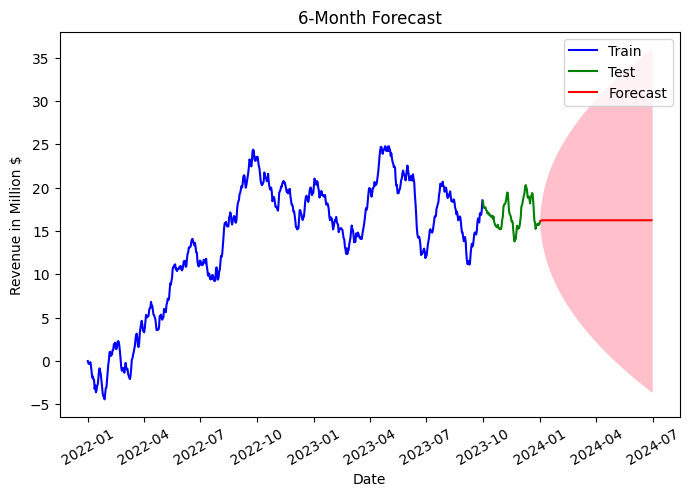

In [27]:
X_train_df = df.loc[:'2023-09-30']
X_test_df = df.loc['2023-10-01':]

#Plot Forecast

plt.figure(figsize=(12,4))
diff_forecast = results.get_forecast(steps=180)
#diff_forecast = results.get_prediction(start =-93)
mean_forecast = diff_forecast.predicted_mean
confidence_intervals = diff_forecast. conf_int()
lower_limits = confidence_intervals.loc[:, 'lower Revenue']
upper_limits = confidence_intervals.loc[:, 'upper Revenue']


 # Display Training, Testing, Forecast, and Confidence Intervals
plt.figure(figsize=(8,5))
plt.plot(X_train_df, color='b', label='Train')
plt.plot(X_test_df, color='g', label='Test')
plt.plot(mean_forecast, label='Forecast', color='r')
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')
plt. title('6-Month Forecast')
plt.xlabel('Date')
plt.ylabel('Revenue in Million $')
plt.xticks(rotation=30, fontsize=10)
plt.legend()



# **RUBRIC: E3 (RECOMMENDATION)**

Few recommendations could be withdrawn from our analysis:

A course of action would be to initially request more historical data, to be able to predict longer periods of time >180 days and more accurately. Also, not to mention that the modeling was performed on non-stationary data, another action would be to test the model on stationary data which might lead to different outcomes that might help the stakeholders in other ways.

*   Based on the predictions we retrieved in section D4, we can say that the ARIMA model has a good performance accuracy and was very close on the predicting the values compared to our test dataset.
*   The output from section E2 shows us the forecasted mean which hovers around 16 million $. That finding did not help us much as it’s only a “mean” and not a variating forecast.

*  The ARIMA model was successfully able to predict values for a 180-day period, the more historical data we have, the better forecast we will get out of that model.




